In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import scipy.ndimage as ndimage
import math
from matplotlib import rcParams
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# from labellines import labelLine, labelLines

params = {'backend': 'ps',
          'font.size': 30,
          'font.family':'serif',
          'font.serif':['Helvetica'],
          'font.style': 'normal',
          'axes.labelsize': 30,
#           'text.fontsize': 30,
          'axes.linewidth': 4,
          'legend.fontsize': 12,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'text.usetex': True,
          'ps.usedistiller': 'xpdf'}

rcParams.update(params)

In [2]:
param_tag_prefix='202202201812'
param_tag_id=['0x005','0x010','0x025','0x050','0x100','0x250']
params=[0.005,0.01,0.025,0.05,0.1,0.25]
AZHData={}
HZAData={}
for tid in param_tag_id:
    AZHData[tid]=pd.read_csv("../../RESULTS/SIGNALS/202202201812/Type-I/nll/AZH_NLL_Result_Benchmark_HA%s_HH%s.txt"%(tid,tid),sep='\s+')
    HZAData[tid]=pd.read_csv("../../RESULTS/SIGNALS/202204191220/Type-I/nll/AZH_NLL_Result_Benchmark_HH%s_HA%s.txt"%(tid,tid),sep='\s+')
    

In [3]:
# Define Frameworks
from scipy.interpolate import bisplrep, bisplev, interp2d, LinearNDInterpolator
from matplotlib import colors
def DrawCSUpperLimitAll(axc,cid):
    tid=param_tag_id[cid]
    data=AZHData[tid]
    y=data['MHA']
    x=data['MHH']
    z=data['cs']*data['mu95']*1000 # fb
    zmin=min(z)
    zmax=max(z)
    print(zmin,zmax)
    ftmp=LinearNDInterpolator(list(zip(x,y)),z)
    MHA=np.linspace(500,800,200)
    MHH=np.linspace(400,700,200)
    MHA,MHH=np.meshgrid(MHA,MHH)
    z=ftmp(MHH,MHA)
    cax=axc.scatter(MHH,MHA,c=z,vmin=8,vmax=40,rasterized=True)#,norm=colors.LogNorm())
    data=HZAData[tid]
    y=data['MHA']
    x=data['MHH']
    z=data['cs']*data['mu95']*1000 # fb
    zmin=min(z)
    zmax=max(z)
    print(zmin,zmax)
    ftmp=LinearNDInterpolator(list(zip(x,y)),z)
    MHH=np.linspace(500,800,200)
    MHA=np.linspace(400,700,200)
    MHA,MHH=np.meshgrid(MHA,MHH)
    z=ftmp(MHH,MHA)
    cax=axc.scatter(MHH,MHA,c=z,vmin=8,vmax=40,rasterized=True)#,norm=colors.LogNorm())
#     cb=fig.colorbar(cax,ax=axc)
#     axc.set_xlabel(r'$m_A$ [GeV]')
#     axc.set_ylabel(r'$m_H$ [GeV]')
    axc.set_xticks([500,600,700,800])
    axc.set_yticks([400,500,600,700])
    axc.xaxis.set_minor_locator(MultipleLocator(20))
    axc.yaxis.set_minor_locator(MultipleLocator(20))
    axc.tick_params('both', length=12, width=4, which='major',direction='in',right=True,top=True)
    axc.tick_params('both', length=6, width=4, which='minor',direction='in',right=True,top=True)
#     cb.set_label(r'$\sigma$ [fb]')
#     cb.set_ticks(cbticks[tid])
    axc.text(420,780,r'$A\to Z(\ell\ell)H(t\bar t)$',color='white')
    axc.text(780,420,r'$H\to Z(\ell\ell)A(t\bar t)$',color='white',rotation=90)
    axc.text(390,480,r'$\Gamma_{H,A}/m_{H,A} = %.1f\%%$'%(params[cid]*100))
    axc.text(390,450,r'$t_\beta = 1,\,c_{\beta-\alpha} = 0$')
    axc.text(390,420,r'$3\,{\rm ab}^{-1}(14\,{\rm TeV})$')
    return cax

def DrawTogether(ax,fig):
    fig.subplots_adjust(wspace=0,hspace=0)
    for i in range(2):
        for j in range(3):
            axc=ax[i,j]
            tagid=i*3+j
            if i == 1:
                axc.set_xlabel(r'$m_H$ [GeV]')
            else:
                axc.set_xticklabels('')
            if j == 0:
                axc.set_ylabel(r'$m_A$ [GeV]')
            else:
                axc.set_yticklabels('')
            cax=DrawCSUpperLimitAll(axc,tagid)
    cab=fig.colorbar(cax,ax=ax,location='right',shrink=1.0,pad=0.005,aspect=32)
    cab.set_label(r'Upper limit on $\sigma$ [fb]',fontsize=35)

8.6168808455 16.050548896
8.563087456099998 17.206614535599996
8.352584452000002 21.141349213599998
9.11790605 22.335988040100002
9.588416157000001 26.1215725824
9.9416711814 29.010648329200002
11.335249888 29.924272488
10.787009101 31.514520685999997
12.159591306100001 31.377397039999998
12.045204171 34.176598219000006
17.690256294000005 37.59386172400001
16.1302806159 39.18786872


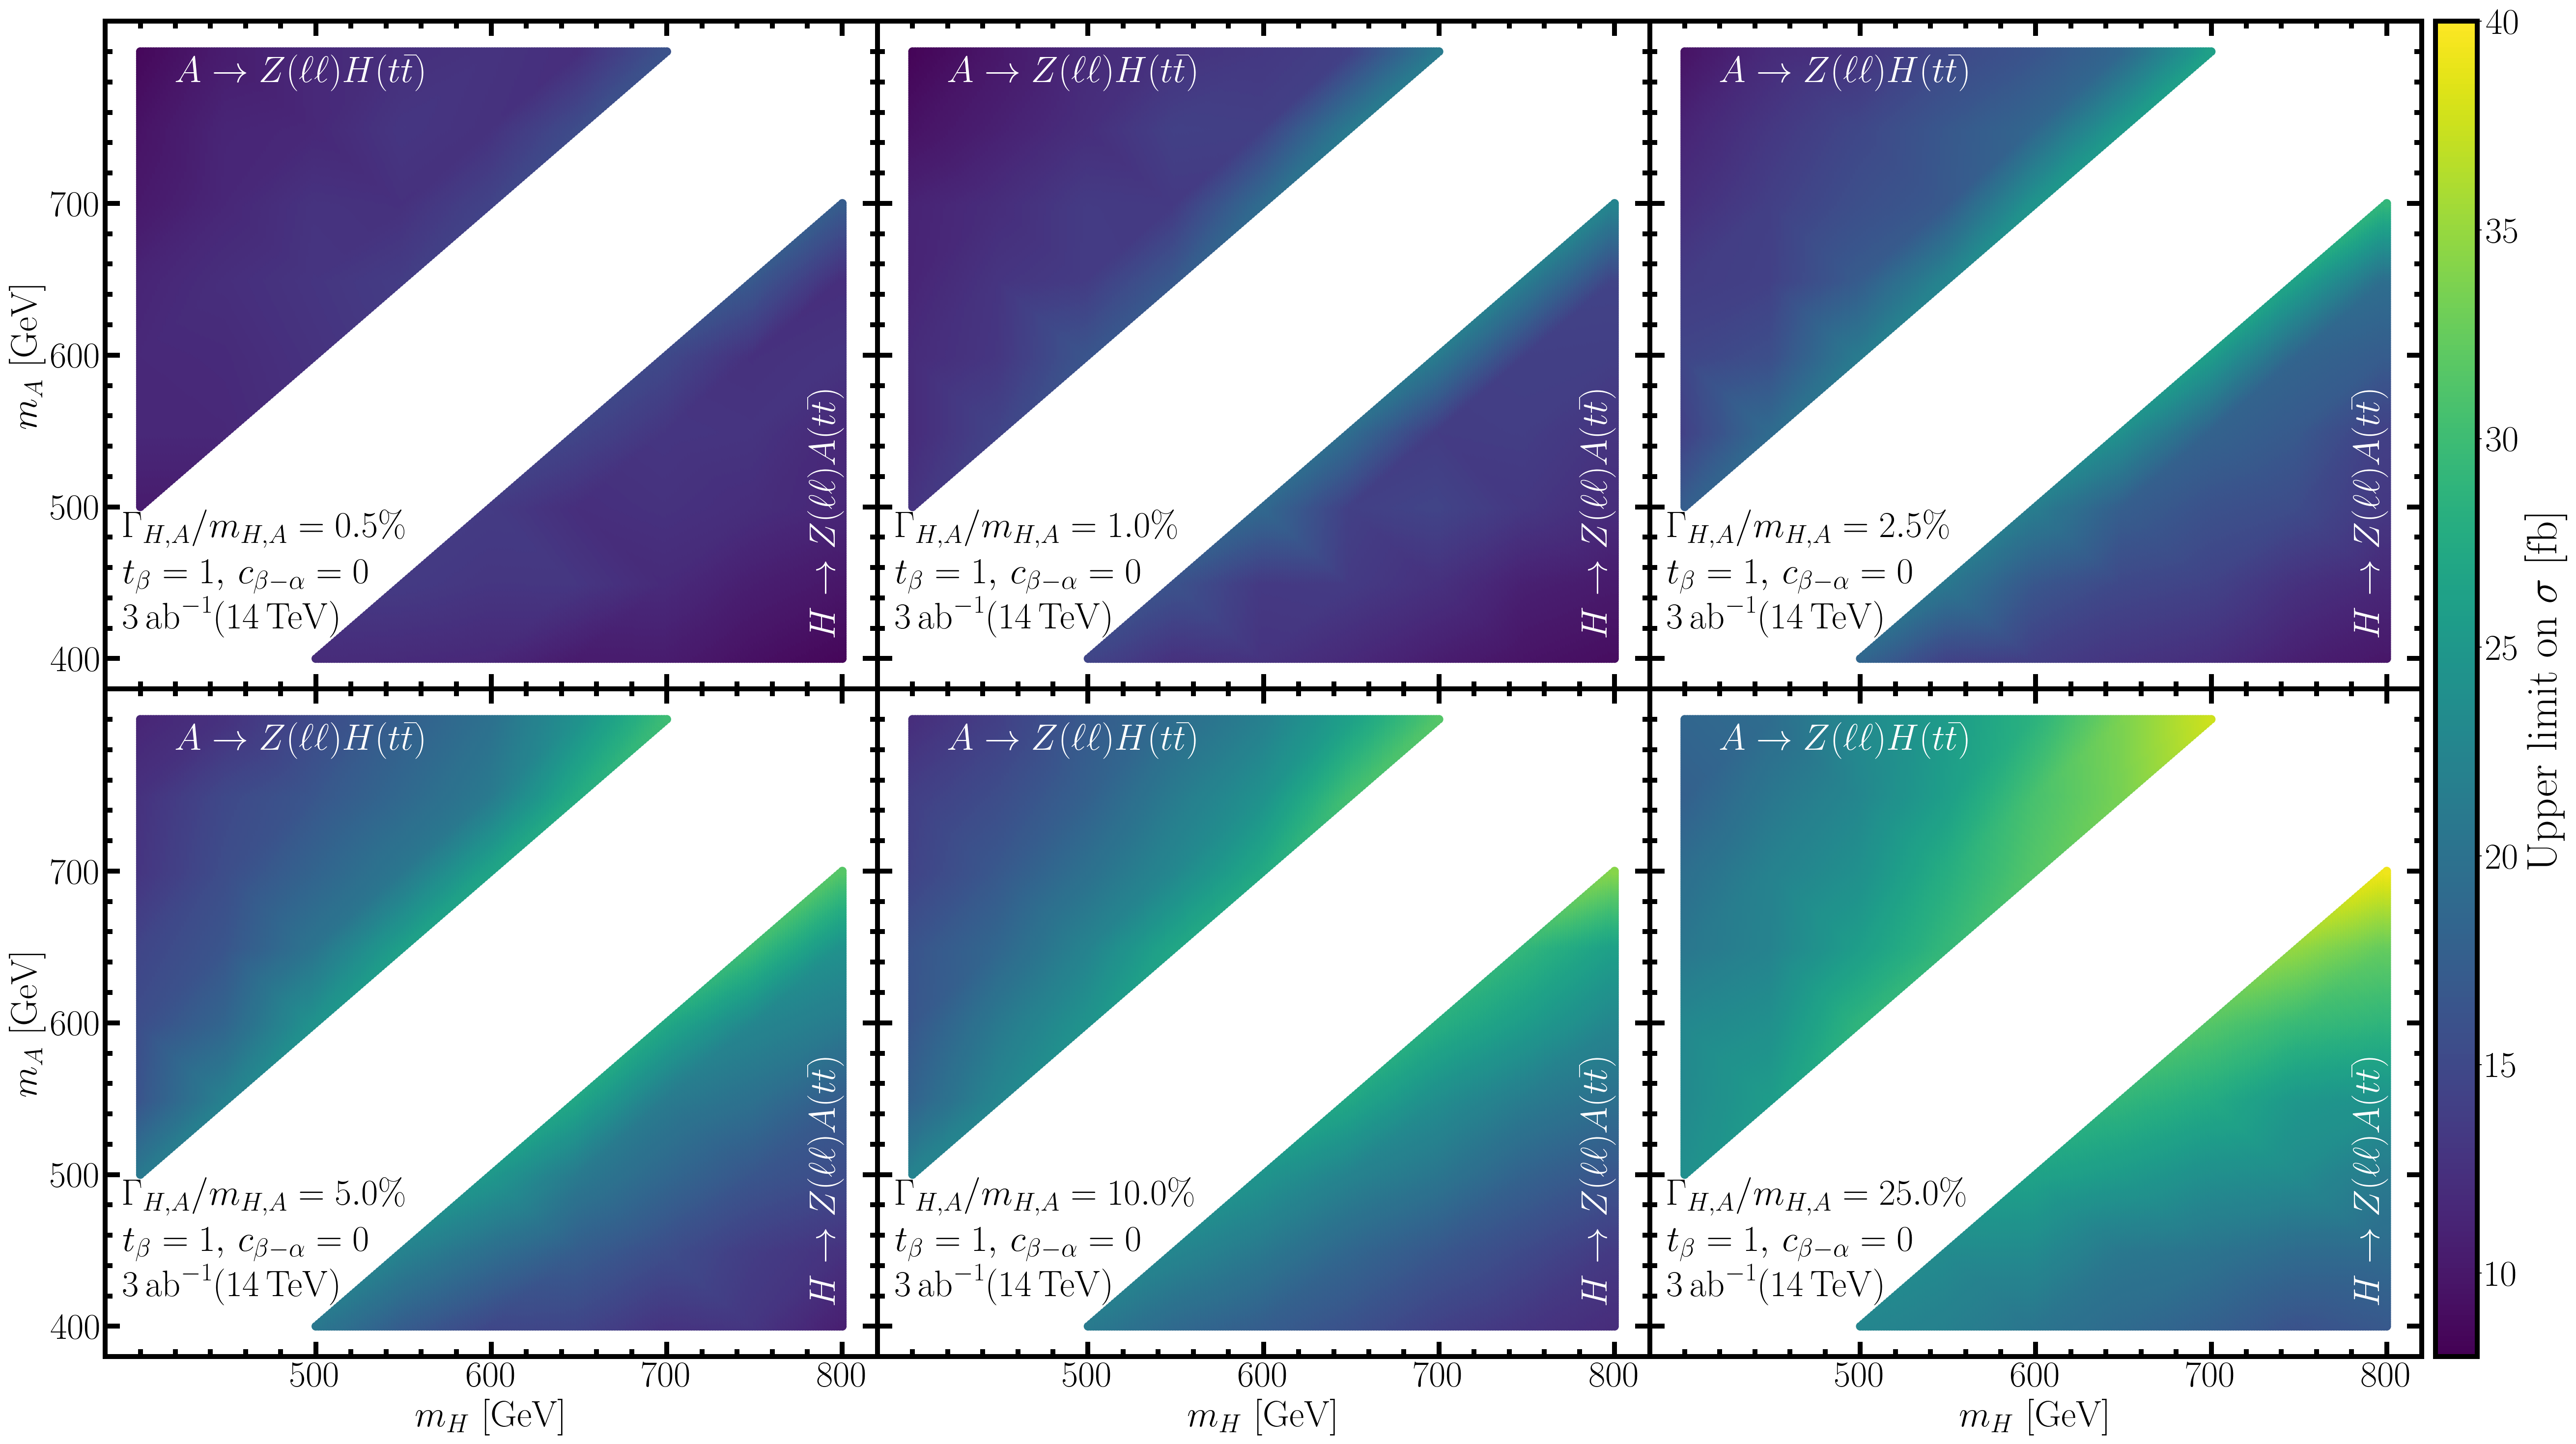

In [4]:
fig,ax=plt.subplots(2,3,figsize=(40,20),dpi=180,facecolor='white')
DrawTogether(ax,fig)
fig.savefig("signal_cs_limit_MHA_MHH.pdf",bbox_inches='tight',pad_inches=0.1)